<a href="https://colab.research.google.com/github/odesay97/MachineLearing_Class/blob/main/4_2_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
['set

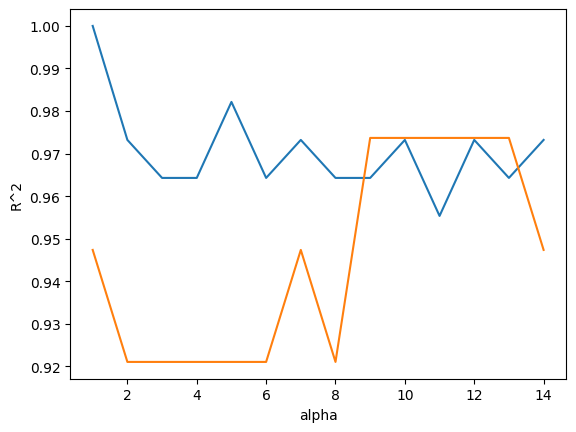

k 최근접 - 훈련 평가 : 0.9732142857142857
k 최근접 - 테스트 평가 : 0.9736842105263158
0.9642857142857143
0.9473684210526315


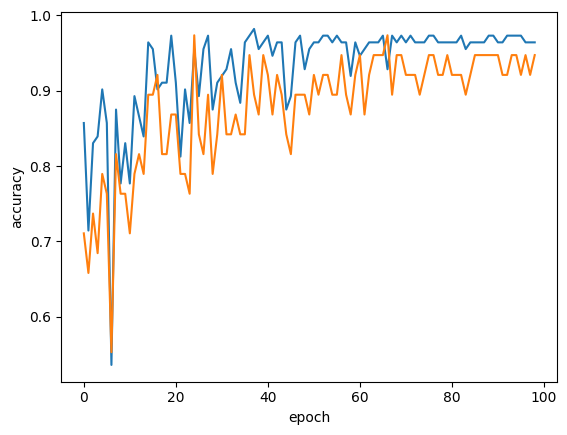

로그로스 훈련 평가 : 0.9464285714285714
로그로스 테스트 평가 : 0.9473684210526315
0.9553571428571429
0.9210526315789473


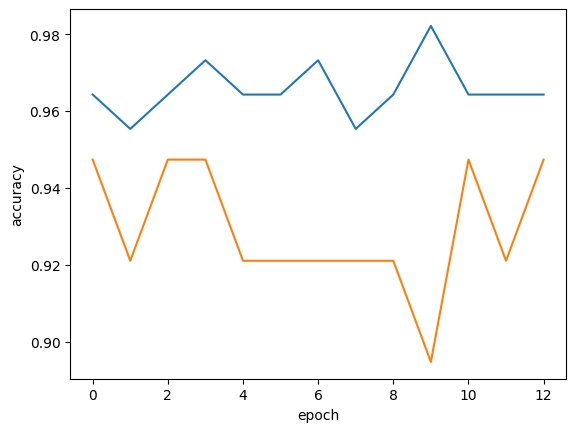

힌지 훈련 평가 : 0.9642857142857143
힌지 테스트 평가 : 0.9473684210526315
0.9821428571428571
0.9473684210526315


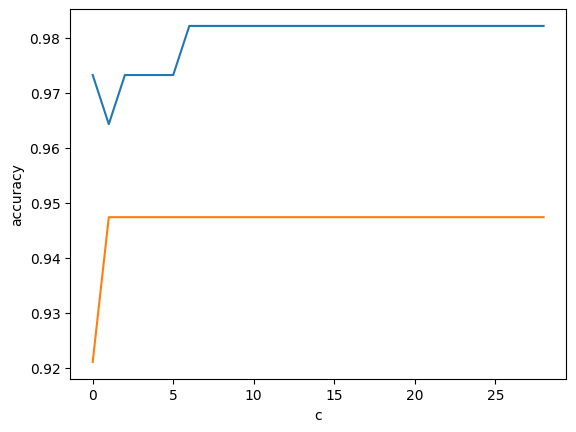

로지스틱 훈련 평가 : 0.9821428571428571
로지스틱 테스트 평가 : 0.9473684210526315


In [62]:
# 1. 데이터 준비
# 2. 클래스 추출
# 3. 입력데이터와 정답데이터를 생성햊보자
# 4. 훈련세트와 테스트세트로 나누자
# 5. 데이터 표준화
# 6. k최근접 이웃 알고지즘을 이용하여 훈련하고 훈련세트와 테스트세트에 대해 평가
# 7. 테스트세트의 5개의 데이터에 대해서 예측과 확률을 알아보자
# 8. 최적화해보자

# k 최근접
import pandas as pd
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv")
print(data)

iris_train = data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy()
print(iris_train[:5])

iris_target = data['Species'].to_numpy()
print(iris_target[:5])

# 클래스 추출
print(np.unique(iris_target))

# 훈련세트 테스트세트 나누기 -> stratify 필수 ! -> 클래스 데이터를 기준으로 편향을 없애므로 아래와 같이

from sklearn.model_selection import train_test_split

train_input, test_input, train_target,test_target = train_test_split(iris_train, iris_target, stratify=iris_target, random_state=42)

# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# k 최근접으로 훈련

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 10)
kn.fit(train_scaled,train_target)

# 평가
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

#  앞에 5개 예측
print(kn.predict(test_scaled[:5]))

# 확률
proba = kn.predict_proba(test_scaled[:5])
print(proba)

# 적합 데이터 확인

train_score = []
test_score = []
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

for alpha in k_list:
  kn = KNeighborsClassifier(n_neighbors = alpha)
  kn.fit(train_scaled,train_target)

  train_score.append(kn.score(train_scaled, train_target))
  test_score.append(kn.score(test_scaled, test_target))


import matplotlib.pyplot as plt

plt.plot(k_list, train_score)
plt.plot(k_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

##### ==> 따라서 n_neighbors = 10 이 가장 최적화

kn = KNeighborsClassifier(n_neighbors = 10)
kn.fit(train_scaled,train_target)

print("k 최근접 - 훈련 평가 : " + str(kn.score(train_scaled,train_target)))
print("k 최근접 - 테스트 평가 : "+str(kn.score(test_scaled,test_target)))





#-------------------------------------------------------

# 확률적 경사하강법

# 데이터 가져오기, 훈련세트 테스트세트 나누기, 정규화까지는 동일

# 확률적 경사하강법 훈련 ( 규제 로그로스 사용 )

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss= 'log_loss',max_iter=100,tol = None, random_state=42)
sgd.fit(train_scaled,train_target)

print(sgd.score(train_scaled,train_target))
print(sgd.score(test_scaled,test_target))

# 그래프로 추이 확인

train_score = []
test_score = []

for alpha in range(1,100):
  sgd = SGDClassifier(loss= 'log_loss',max_iter=alpha,tol = None, random_state=42)
  sgd.fit(train_scaled,train_target)

  train_score.append(sgd.score(train_scaled, train_target))
  test_score.append(sgd.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# epoch 61 정도에서 최선임을 확인 -> 정답률은 비슷하지만, 과대적합이 더 해소됨

sgd = SGDClassifier(loss= 'log_loss',max_iter=61,tol = None, random_state=42)
sgd.fit(train_scaled,train_target)

print("로그로스 훈련 평가 : " + str(sgd.score(train_scaled,train_target)))
print("로그로스 테스트 평가 : "+str(sgd.score(test_scaled,test_target)))

# -----------------------------------

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss= 'hinge',max_iter=100,tol = None, random_state=42)
sgd.fit(train_scaled,train_target)

print(sgd.score(train_scaled,train_target))
print(sgd.score(test_scaled,test_target))

# 그래프로 추이 확인

train_score = []
test_score = []

for alpha in range(87,100):
  sgd = SGDClassifier(loss= 'hinge',max_iter=alpha,tol = None, random_state=42)
  sgd.fit(train_scaled,train_target)

  train_score.append(sgd.score(train_scaled, train_target))
  test_score.append(sgd.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# epoch 87에서 최선임을 확인

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss= 'hinge',max_iter=87,tol = None, random_state=42)
sgd.fit(train_scaled,train_target)

print("힌지 훈련 평가 : " + str(sgd.score(train_scaled,train_target)))
print("힌지 테스트 평가 : "+str(sgd.score(test_scaled,test_target)))

#==> 결과적으로 log_loss함수를 통해 61의 epoch에서 최선임을 확인할 수 있습니다 !



# ------------------------------------------------------

# 로지스틱 회귀
# 데이터 가져오기, 입력데이터 정답 데이터 생성, 데이터 나누기, 정규화는 동일

# 로지스틱 회귀 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)

print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))


# 그래프로 추이 확인

train_score = []
test_score = []

for c in range(1,30):
  lr = LogisticRegression(C=c, max_iter=1000)
  lr.fit(train_scaled,train_target)

  train_score.append(lr.score(train_scaled, train_target))
  test_score.append(lr.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('c')
plt.ylabel('accuracy')
plt.show()

# 현재 적중률이 제일 높음 단 현재 적중률로 올때, 20까지 안해도 됨

print("로지스틱 훈련 평가 : " + str(lr.score(train_scaled,train_target)))
print("로지스틱 테스트 평가 : "+str(lr.score(test_scaled,test_target)))


